In [25]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import cv2

In [3]:

def count_files_per_folder(directory):
    files_count = {}
    for foldername, _, filenames in os.walk(directory):
        files_count[foldername] = len(filenames)
    return files_count

directory_path = "Dataset"
files_per_folder = count_files_per_folder(directory_path)

for folder, count in files_per_folder.items():
    print(f"Folder '{folder}' contains {count} file(s).")


Folder 'Dataset' contains 0 file(s).
Folder 'Dataset\Mild_Demented' contains 896 file(s).
Folder 'Dataset\Moderate_Demented' contains 64 file(s).
Folder 'Dataset\Non_Demented' contains 3200 file(s).
Folder 'Dataset\Very_Mild_Demented' contains 2240 file(s).


In [19]:
# label 0 for non_demented, 1 for everythingi else
images = []
labels = []
# print(os.listdir('Dataset'))
for subfolder in tqdm(os.listdir('Dataset')):
    subfolder_path = os.path.join('Dataset', subfolder)
    # print(os.listdir(subfolder_path))
    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
        labels.append(subfolder)
df = pd.DataFrame({'image': images, 'label': labels})
df

100%|██████████| 4/4 [00:00<00:00, 83.84it/s]


,image,label
0,Dataset\Mild_Demented\mild.jpg,Mild_Demented
1,Dataset\Mild_Demented\mild_10.jpg,Mild_Demented
2,Dataset\Mild_Demented\mild_100.jpg,Mild_Demented
3,Dataset\Mild_Demented\mild_101.jpg,Mild_Demented
4,Dataset\Mild_Demented\mild_102.jpg,Mild_Demented
...,...,...
6395,Dataset\Very_Mild_Demented\verymild_995.jpg,Very_Mild_Demented
6396,Dataset\Very_Mild_Demented\verymild_996.jpg,Very_Mild_Demented
6397,Dataset\Very_Mild_Demented\verymild_997.jpg,Very_Mild_Demented
6398,Dataset\Very_Mild_Demented\verymild_998.jpg,Very_Mild_Demented


In [22]:
df['label2'] = np.where(df['label'] == 'Non_Demented', 0, 1)
df

,image,label,label2
0,Dataset\Mild_Demented\mild.jpg,Mild_Demented,1
1,Dataset\Mild_Demented\mild_10.jpg,Mild_Demented,1
2,Dataset\Mild_Demented\mild_100.jpg,Mild_Demented,1
3,Dataset\Mild_Demented\mild_101.jpg,Mild_Demented,1
4,Dataset\Mild_Demented\mild_102.jpg,Mild_Demented,1
...,...,...,...
6395,Dataset\Very_Mild_Demented\verymild_995.jpg,Very_Mild_Demented,1
6396,Dataset\Very_Mild_Demented\verymild_996.jpg,Very_Mild_Demented,1
6397,Dataset\Very_Mild_Demented\verymild_997.jpg,Very_Mild_Demented,1
6398,Dataset\Very_Mild_Demented\verymild_998.jpg,Very_Mild_Demented,1


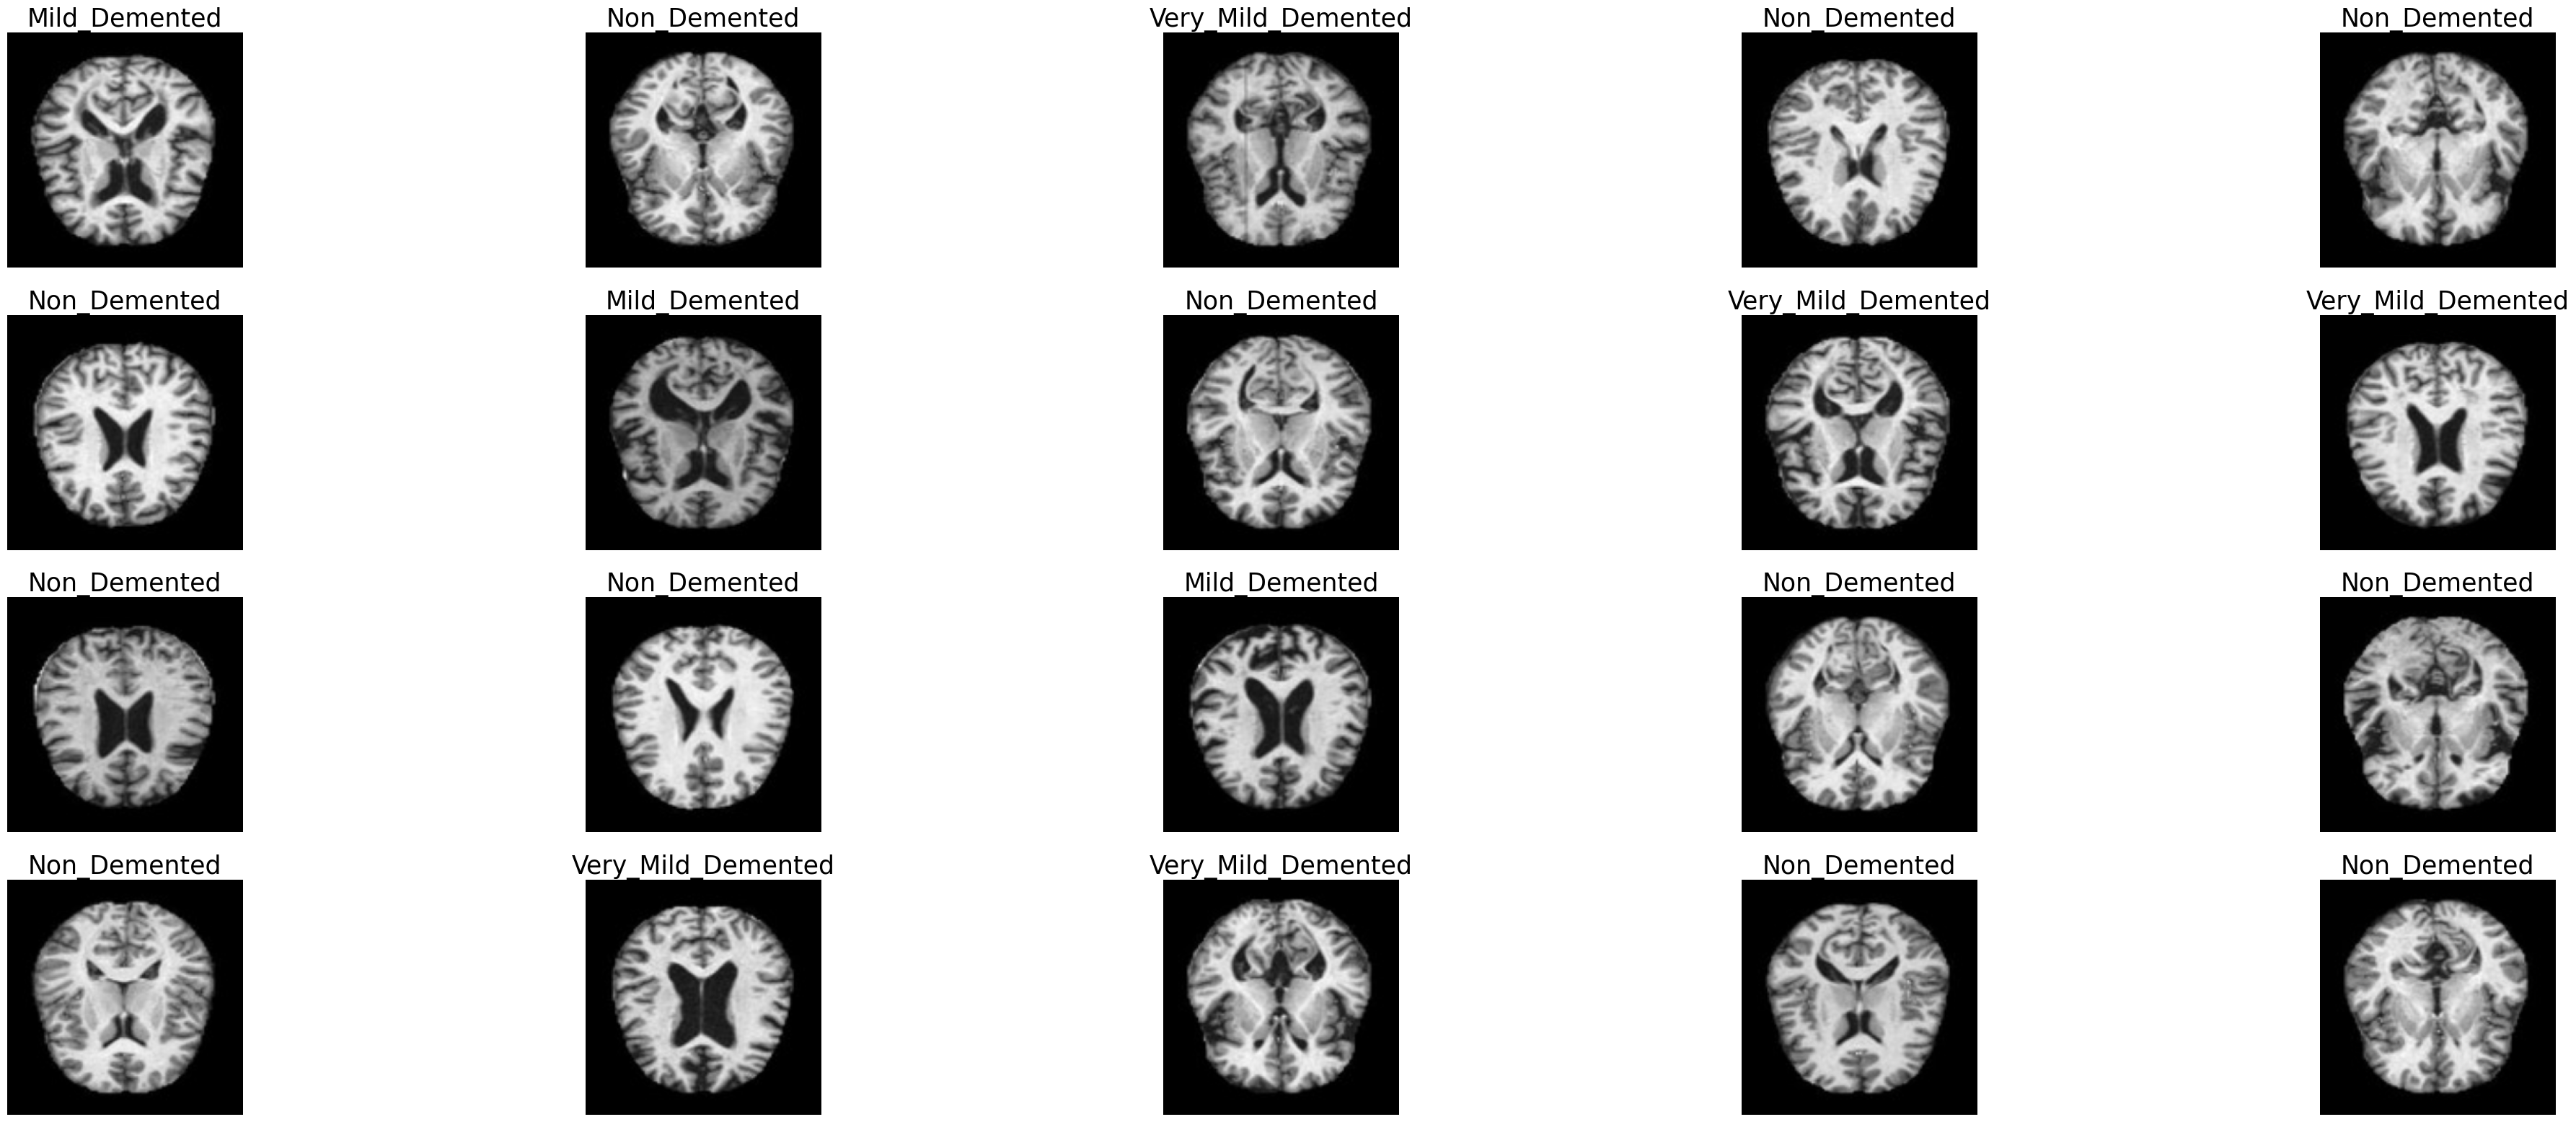

In [26]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(df),20)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=25)